In [1]:
import numpy as np
import os
import glob
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
curr = os.getcwd()
paths = [os.path.join(curr,"data/SIN-MAA"),os.path.join(curr,"data/SIN-BLR"),os.path.join(curr,"data/SIN-DEL")]
extension = 'csv'
all_df = pd.DataFrame()
for path in paths:
    os.chdir(path)
    filenames = [i for i in glob.glob('*.{}'.format(extension))]
#     print(filenames)
    dfs = pd.concat([pd.read_csv(f, parse_dates=['travel_date'], dayfirst=True) for f in filenames ], ignore_index=True)
    all_df = pd.concat([all_df, dfs])
os.chdir(curr)
# print(all_df.sample(10))

In [2]:
df = all_df.copy()
df = df.drop(df[df.price == 'Price unavailable' ].index)
print(df.columns)
print(df.shape)
print(df.carrier.unique())
print(df.source.unique())
print(df.destination.unique())

Index(['carrier', 'departure_time', 'stops', 'source', 'destination',
       'itinerary_type', 'travel_date', 'days_before_travel', 'price'],
      dtype='object')
(4564, 9)
['IndiGo' 'Scoot' 'Silkair' 'Singapore Airlines' 'Air-India Express'
 'Air India' 'Vistara']
['SIN']
['MAA' 'BLR' 'DEL']


In [3]:
df.isnull().sum()

carrier               0
departure_time        0
stops                 0
source                0
destination           0
itinerary_type        0
travel_date           0
days_before_travel    0
price                 0
dtype: int64

In [4]:
df_duplicate = df[df.duplicated()]
df_duplicate

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price


In [5]:
def clean_currency(x):
    if isinstance(x, str):
        return(x.replace(',', ''))
    return(x)
df['price'] = df['price'].apply(clean_currency).astype('float')

In [6]:
df.sample(5)

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price
461,Air-India Express,0:10,Non-stop,SIN,MAA,one-way,2020-06-21,68,168.0
589,Singapore Airlines,16:50,Non-stop,SIN,DEL,one-way,2020-06-07,52,582.0
1582,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-07-05,80,330.0
312,Singapore Airlines,22:20,Non-stop,SIN,BLR,one-way,2020-07-25,102,290.0
180,IndiGo,2:45,Non-stop,SIN,BLR,one-way,2020-06-19,66,249.0


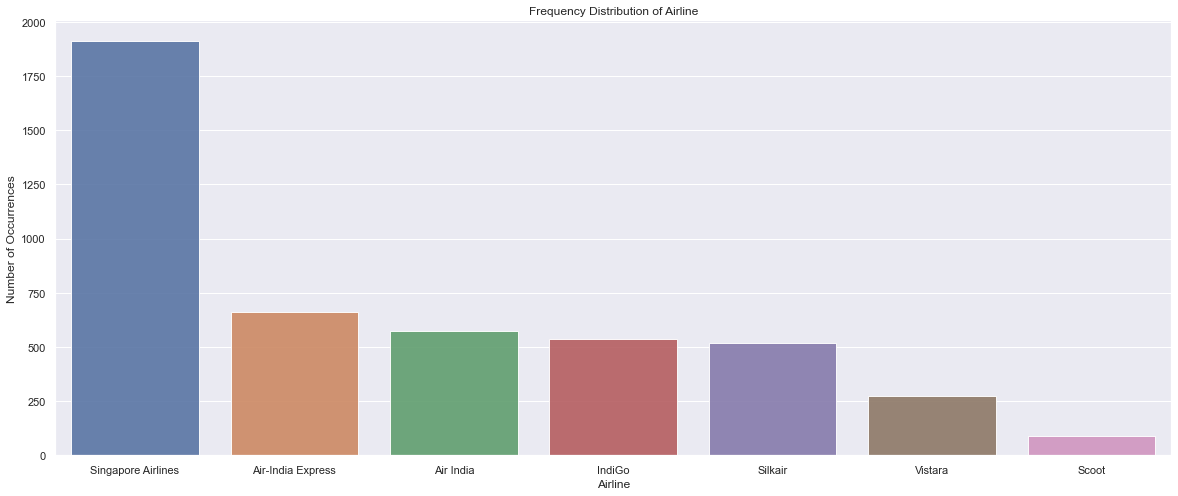

In [7]:
plt.figure(figsize=(20, 8))
airline_count = df['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(airline_count.index, airline_count.values, alpha=0.9)
plt.title('Frequency Distribution of Airline')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Airline', fontsize=12)
plt.show()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4564 entries, 0 to 1651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   carrier             4564 non-null   object        
 1   departure_time      4564 non-null   object        
 2   stops               4564 non-null   object        
 3   source              4564 non-null   object        
 4   destination         4564 non-null   object        
 5   itinerary_type      4564 non-null   object        
 6   travel_date         4564 non-null   datetime64[ns]
 7   days_before_travel  4564 non-null   int64         
 8   price               4564 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 356.6+ KB


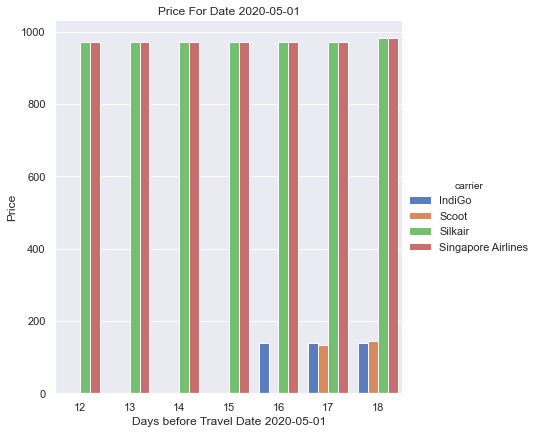

In [9]:
import datetime
date = datetime.datetime.strptime("2020-05-01", '%Y-%m-%d')
destination = 'MAA'
filter_df = df[(df['travel_date'] == date) & (df['destination'] == destination)]
sns.set(style="darkgrid")
s = sns.catplot(x="days_before_travel", y="price", hue="carrier", data=filter_df,
                height=6, kind="bar", palette="muted")
plt.title('Price For Date {}'.format(date.date()))
plt.ylabel('Price', fontsize=12)
plt.xlabel('Days before Travel Date {}'.format(date.date()), fontsize=12)
plt.show()

In [10]:
filter_df_SQ = filter_df.copy()
filter_df_SQ = filter_df_SQ[(filter_df_SQ['carrier'] == 'Singapore Airlines')]
filter_df_SQ.sort_values(by=['days_before_travel'], inplace=True)
filter_df_SQ

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price
2711,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-01,12,972.0
2214,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-01,13,972.0
1707,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-01,14,972.0
1193,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-01,15,972.0
679,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-01,16,972.0
163,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-01,17,970.0
3,Singapore Airlines,20:25,Non-stop,SIN,MAA,one-way,2020-05-01,18,981.0


In [11]:
filter_df_IG = filter_df.copy()
filter_df_IG = filter_df_IG[(filter_df_IG['carrier'] == 'IndiGo')]
filter_df_IG.sort_values(by=['days_before_travel'], inplace=True)
filter_df_IG

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price
677,IndiGo,11:30,Non-stop,SIN,MAA,one-way,2020-05-01,16,139.0
161,IndiGo,11:30,Non-stop,SIN,MAA,one-way,2020-05-01,17,139.0
0,IndiGo,11:30,Non-stop,SIN,MAA,one-way,2020-05-01,18,139.0


In [12]:
filter_df_SC = filter_df.copy()
filter_df_SC = filter_df_SC[(filter_df_SC['carrier'] == 'Scoot')]
filter_df_SC.sort_values(by=['days_before_travel'], inplace=True)
filter_df_SC

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price
160,Scoot,22:50,Non-stop,SIN,MAA,one-way,2020-05-01,17,134.0
1,Scoot,22:50,Non-stop,SIN,MAA,one-way,2020-05-01,18,144.0


In [13]:
filter_df_AE = filter_df.copy()
filter_df_AE = filter_df_AE[(filter_df_AE['carrier'] == 'Air-India Express')]
filter_df_AE.sort_values(by=['days_before_travel'], inplace=True)
filter_df_AE

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price


In [14]:
filter_df_AI = filter_df.copy()
filter_df_AI = filter_df_AI[(filter_df_AI['carrier'] == 'Air India')]
filter_df_AI.sort_values(by=['days_before_travel'], inplace=True)
filter_df_AI

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price


In [15]:
filter_df_SA = filter_df.copy()
filter_df_SA = filter_df_SA[(filter_df_SA['carrier'] == 'Silkair')]
filter_df_SA.sort_values(by=['days_before_travel'], inplace=True)
filter_df_SA

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price
2710,Silkair,07:40,Non-stop,SIN,MAA,one-way,2020-05-01,12,972.0
2213,Silkair,07:40,Non-stop,SIN,MAA,one-way,2020-05-01,13,972.0
1706,Silkair,07:40,Non-stop,SIN,MAA,one-way,2020-05-01,14,972.0
1192,Silkair,07:40,Non-stop,SIN,MAA,one-way,2020-05-01,15,972.0
678,Silkair,7:40,Non-stop,SIN,MAA,one-way,2020-05-01,16,972.0
162,Silkair,7:40,Non-stop,SIN,MAA,one-way,2020-05-01,17,970.0
2,Silkair,7:40,Non-stop,SIN,MAA,one-way,2020-05-01,18,981.0


In [16]:
df_encoded = df.copy()
replace_map = {'carrier': {'Singapore Airlines': 1, 'IndiGo': 2, 'Air-India Express': 3, 'Silkair': 4,
                                  'Air India': 5, 'Scoot': 6, 'Vistara': 7}, 'stops': {'Non-stop': 1}, 'source': {'SIN': 1}, 
                                'destination': {'MAA': 1, 'BLR': 2, 'DEL': 3}, 'itinerary_type': {'one-way': 1}}
df_encoded.replace(replace_map, inplace=True)
df_encoded.sample(5)

,carrier,departure_time,stops,source,destination,itinerary_type,travel_date,days_before_travel,price
1822,1,20:25,1,1,1,1,2020-05-23,36,972.0
1960,5,09:00,1,1,1,1,2020-06-15,59,205.0
1041,1,20:05,1,1,2,1,2020-05-21,34,1002.0
365,7,09:30,1,1,3,1,2020-07-16,92,261.0
121,1,20:05,1,1,2,1,2020-06-03,50,562.0


In [17]:
df_split = df_encoded.copy()
df_split[["travel_year","travel_month","travel_day"]] = df_split["travel_date"].astype(str).str.split("-", expand=True).astype(int)
df_split[["departure_hour", "departure_minute"]] = df_split["departure_time"].str.split(":", expand=True).astype(int)
df_split = df_split.drop(columns=['travel_date', 'departure_time', 'travel_year', 'itinerary_type', 'stops'])
df_split.head()

,carrier,source,destination,days_before_travel,price,travel_month,travel_day,departure_hour,departure_minute
0,2,1,1,18,139.0,5,1,11,30
1,6,1,1,18,144.0,5,1,22,50
2,4,1,1,18,981.0,5,1,7,40
3,1,1,1,18,981.0,5,1,20,25
4,6,1,1,19,136.0,5,2,22,50


In [18]:
df_hour_range=df_split.copy()
df_hour_range["departure_hour_range"] = pd.cut(x=df_hour_range['departure_hour'], bins=[0, 6, 12, 18, 24], labels=[1, 2, 3, 4], right=False).astype(int)
df_hour_range.sample(5)

,carrier,source,destination,days_before_travel,price,travel_month,travel_day,departure_hour,departure_minute,departure_hour_range
865,1,1,1,49,496.0,6,3,20,25,4
3204,5,1,1,101,205.0,7,29,9,0,2
993,4,1,2,21,1002.0,5,8,9,5,2
363,2,1,2,28,184.0,5,13,2,45,1
1619,4,1,2,102,290.0,7,29,9,5,2


In [19]:
df_split = df_hour_range.drop(columns=['departure_hour', 'departure_minute'])
df_split.sample(5)

,carrier,source,destination,days_before_travel,price,travel_month,travel_day,departure_hour_range
829,7,1,3,103,261.0,7,28,2
188,3,1,2,68,229.0,6,21,2
518,4,1,2,68,564.0,6,22,2
1723,1,1,1,18,972.0,5,5,4
3132,1,1,1,85,250.0,7,13,4


In [20]:
df_final = df_split.copy()
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4564 entries, 0 to 1651
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   carrier               4564 non-null   int64  
 1   source                4564 non-null   int64  
 2   destination           4564 non-null   int64  
 3   days_before_travel    4564 non-null   int64  
 4   price                 4564 non-null   float64
 5   travel_month          4564 non-null   int64  
 6   travel_day            4564 non-null   int64  
 7   departure_hour_range  4564 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 320.9 KB
None


In [21]:
y = df_final.pop('price')
print(y.sample(5))
X = df_final
print(X.sample(5))

639     150.0
1084    582.0
1498    564.0
739     143.0
195     269.0
Name: price, dtype: float64
     carrier  source  destination  days_before_travel  travel_month  \
311        1       1            2                 102             7   
497        7       1            3                  33             5   
991        1       1            2                  20             5   
271        5       1            3                  73             6   
185        2       1            3                  56             6   

     travel_day  departure_hour_range  
311          25                     4  
497          19                     2  
991           7                     4  
271          27                     2  
185          10                     4  


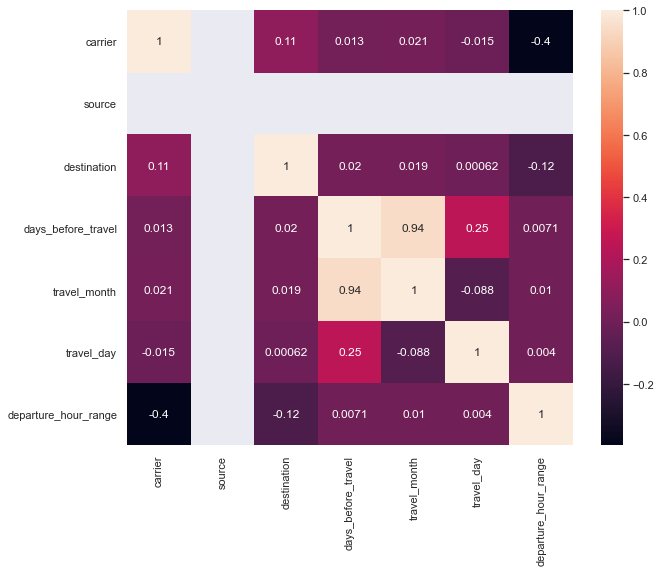

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)
model = RandomForestRegressor()
model = model.fit(X_train, y_train)
train_accuracy = model.score(X_train, y_train) * 100
print('Accuracy of Training Set: {:.2f}'.format(train_accuracy))

Accuracy of Training Set: 99.95


[0.47997024 0.         0.03197847 0.01468478 0.45447779 0.00177149
 0.01711723]


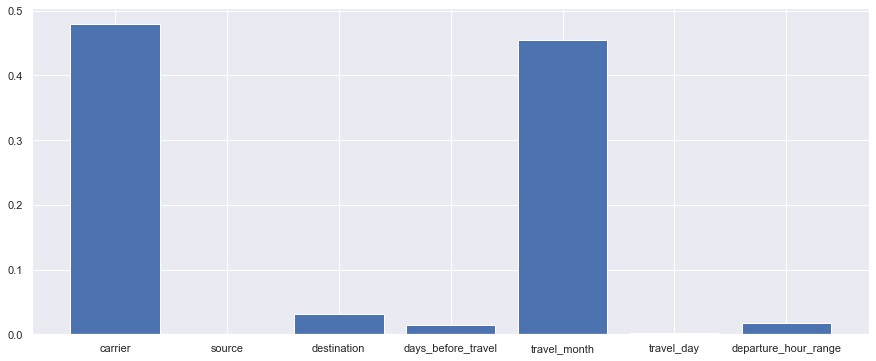

In [24]:
importances = model.feature_importances_
print(importances)
plt.figure(figsize=(15, 6))
importance = model.feature_importances_
plt.bar([x for x in X.columns], importance)
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred , squared=False))
print(r2_score(y_test, y_pred))

4.530652173913047
12.202884459439698
0.997637140291878


In [26]:
y_pred = model.predict(X_train)
print(mean_absolute_error(y_train, y_pred))
print(mean_squared_error(y_train, y_pred , squared=False))
print(r2_score(y_train, y_pred))

1.5918083169965636
6.863826729793695
0.9994619376615884


In [27]:
import joblib
joblib.dump(model, 'airfare-MAA-BLR-DEL.pkl')

['airfare-MAA-BLR-DEL.pkl']

In [28]:
"""
{
'Singapore Airlines': 1, 
'IndiGo': 2, 
'Air-India Express': 3, 
'Silkair': 4,
'Air India': 5, 
'Scoot': 6, 
'Vistara': 7
}
{'SIN': 1}
{'MAA': 1, 'BLR': 2, 'DEL': 3}
"""
model = joblib.load('airfare-MAA-BLR-DEL.pkl')

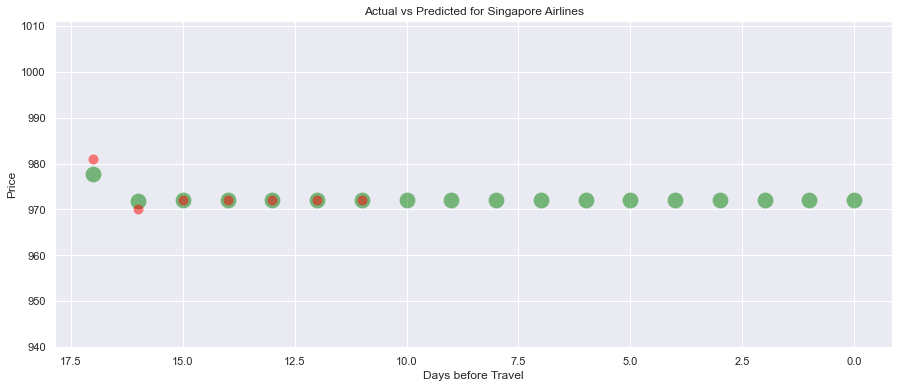

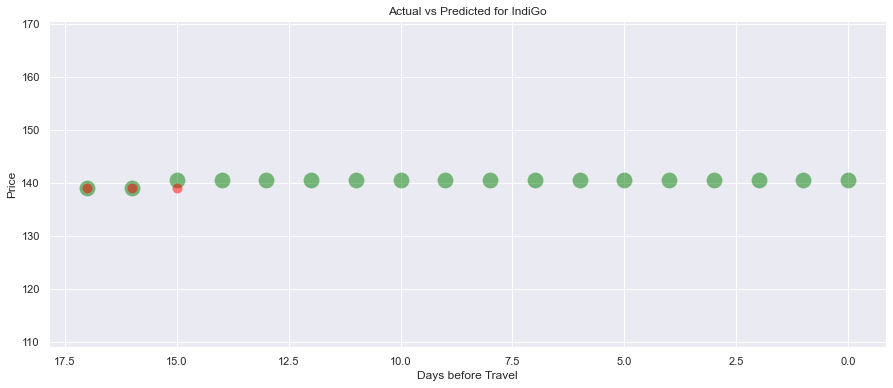

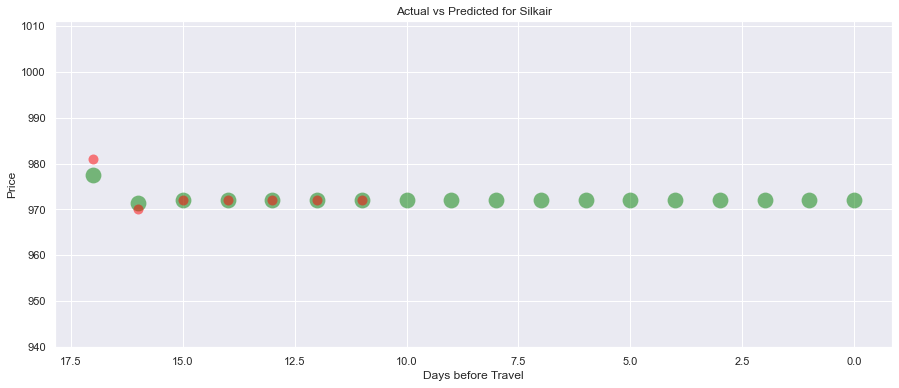

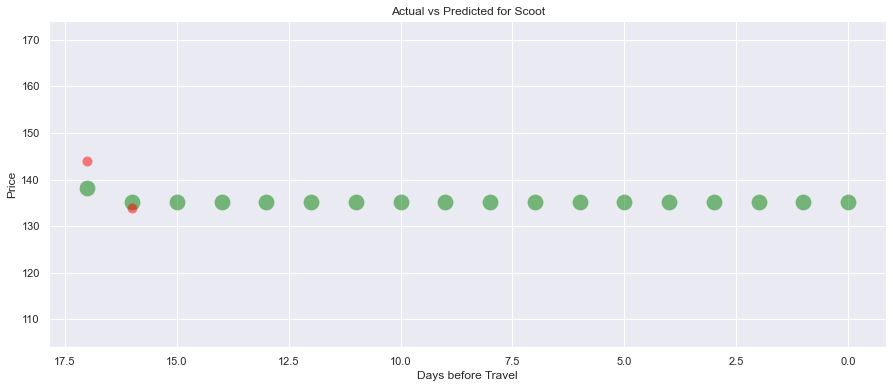

In [29]:
carrmap = {1: 'Singapore Airlines',2: 'IndiGo',3:'Air-India Express',4:'Silkair',5:'Air India',6:'Scoot',7:'Vistara'}
days = 18
carr = [1,2,3,4,5,6]
source = 1
dest = 1
trav_mnth = 5
trav_day = 1
dep_hour_range = [4,2,1,2,2,4]
for i in range(0,len(carr)):
    
    filter_df_ = df_split.copy()
    filter_df_ = filter_df_[(filter_df_['carrier'] == carr[i])]
    filter_df_ = filter_df_[(filter_df_['travel_month'] == trav_mnth) & (filter_df_['destination'] == dest) & (filter_df_['travel_day'] == trav_day)]
    filter_df_ = filter_df_[(filter_df_['departure_hour_range'] == dep_hour_range[i])]
    filter_df_.sort_values(by=['days_before_travel'], inplace=True)
    #print(filter_df_)
    #print("Count {}".format(filter_df_.shape[0]))
    if filter_df_.shape[0] == 0:
        continue
    predict = pd.DataFrame()
    predict['carrier'] = [carr[i] for x in range(0,days)]
    predict['source'] = [source for x in range(0,days)]
    predict['destination'] = [dest for x in range(0,days)]
    predict['days_before_travel'] = [x for x in range(1,days+1)]
    predict['travel_month'] = [trav_mnth for x in range(0,days)]
    predict['travel_day'] = [trav_day for x in range(0,days)]
    predict['departure_hour_range'] = [dep_hour_range[i] for x in range(0,days)]

    pred = model.predict(predict)
    #print(pred)
    act = np.array(filter_df_['price'])
    min_max = np.concatenate((pred, act), axis=0)
    actual = np.pad(act, (days-act.size, 0), 'constant')
    #print(actual)
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.scatter(x = range(0, pred.size), y=pred, c = 'green', label = 'Actual', alpha = 0.5, s=250, 
               linewidth=0, edgecolors='green')
    ax.scatter(x = range(0, actual.size), y=actual, c = 'red', label = 'Predicted', alpha = 0.5, s=100, 
               linewidth=0, edgecolors='red')
    plt.title('Actual vs Predicted for {}'.format(carrmap.get(carr[i])))
    plt.xlabel('Days before Travel')
    plt.ylabel('Price')
    plt.gca().invert_xaxis()
    plt.ylim(min(min_max)-30, max(min_max)+30)
    plt.show()

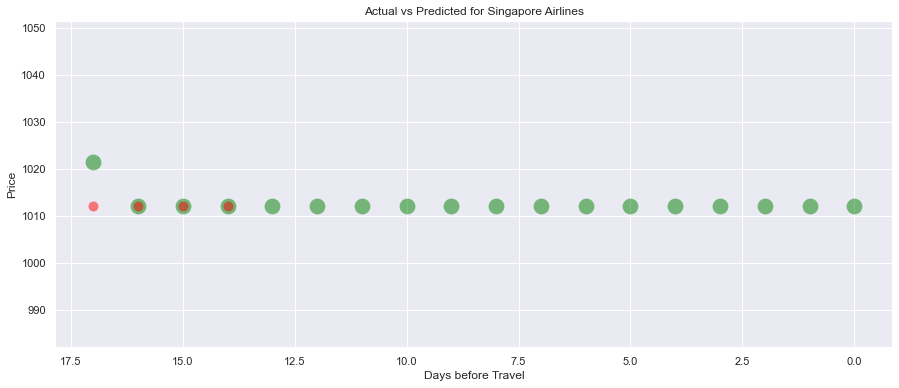

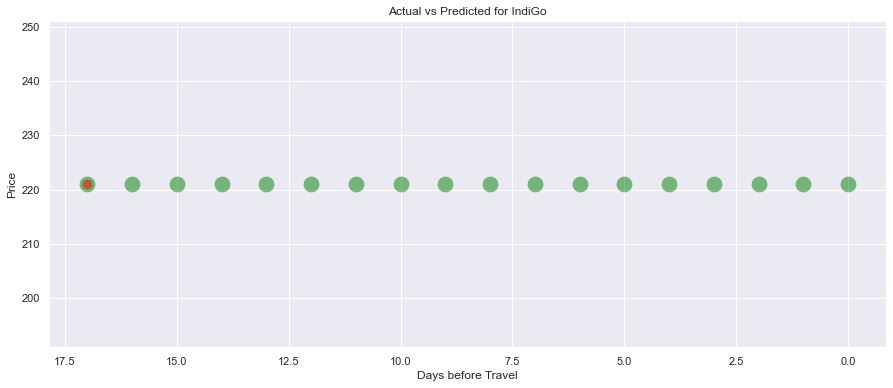

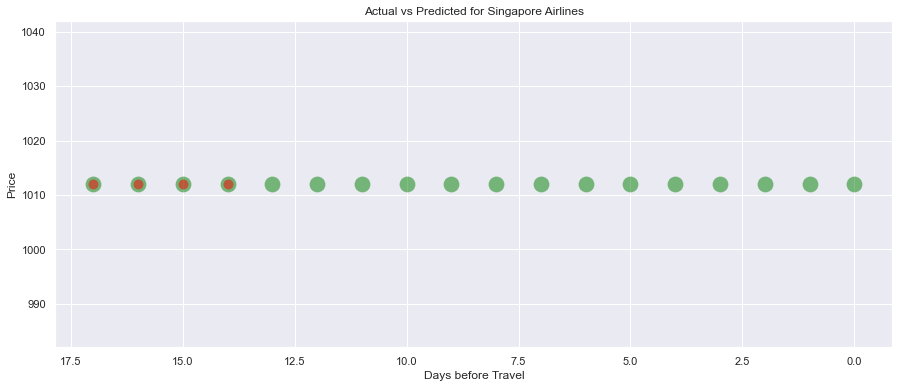

In [35]:
carrmap = {1: 'Singapore Airlines',2: 'IndiGo',5:'Air India',7:'Vistara'}
days = 18
carr = [1,2,1,5,7]
source = 1
dest = 3
trav_mnth = 5
trav_day = 1
dep_hour_range = [3,4,1,2,2]
for i in range(0,len(carr)):
    
    filter_df_ = df_split.copy()
    filter_df_ = filter_df_[(filter_df_['carrier'] == carr[i])]
    filter_df_ = filter_df_[(filter_df_['travel_month'] == trav_mnth) & (filter_df_['destination'] == dest) & (filter_df_['travel_day'] == trav_day)]
    filter_df_ = filter_df_[(filter_df_['departure_hour_range'] == dep_hour_range[i])]
    filter_df_.sort_values(by=['days_before_travel'], inplace=True)
    #print(filter_df_)
    #print("Count {}".format(filter_df_.shape[0]))
    if filter_df_.shape[0] == 0:
        continue

    predict = pd.DataFrame()
    predict['carrier'] = [carr[i] for x in range(0,days)]
    predict['source'] = [source for x in range(0,days)]
    predict['destination'] = [dest for x in range(0,days)]
    predict['days_before_travel'] = [x for x in range(1,days+1)]
    predict['travel_month'] = [trav_mnth for x in range(0,days)]
    predict['travel_day'] = [trav_day for x in range(0,days)]
    predict['departure_hour_range'] = [dep_hour_range[i] for x in range(0,days)]
    #print(predict)
    pred = model.predict(predict)
    #print(pred)
    act = np.array(filter_df_['price'])
    min_max = np.concatenate((pred, act), axis=0)
    actual = np.pad(act, (days-act.size, 0), 'constant')
    #print(actual)
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.scatter(x = range(0, pred.size), y=pred, c = 'green', label = 'Actual', alpha = 0.5, s=250, 
               linewidth=0, edgecolors='green')
    ax.scatter(x = range(0, actual.size), y=actual, c = 'red', label = 'Predicted', alpha = 0.5, s=100, 
               linewidth=0, edgecolors='red')
    plt.title('Actual vs Predicted for {}'.format(carrmap.get(carr[i])))
    plt.xlabel('Days before Travel')
    plt.ylabel('Price')
    plt.gca().invert_xaxis()
    plt.ylim(min(min_max)-30, max(min_max)+30)
    plt.show()

### Appendix

In [43]:
df_query = df_split.copy()
df_query.query('carrier == 1 and destination == 1 and travel_month == 5 and travel_day == 1') 

,carrier,source,destination,days_before_travel,price,travel_month,travel_day,departure_hour_range
3,1,1,1,18,981.0,5,1,4
163,1,1,1,17,970.0,5,1,4
679,1,1,1,16,972.0,5,1,4
1193,1,1,1,15,972.0,5,1,4
1707,1,1,1,14,972.0,5,1,4
2214,1,1,1,13,972.0,5,1,4


In [52]:
predict['carrier'] = [1 for i in range(1,19)]
predict['source'] = [1 for i in range(1,19)]
predict['destination'] = [1 for i in range(1,19)]
predict['days_before_travel'] = [x for x in range(1,19)]
predict['travel_month'] = [5 for x in range(1,19)]
predict['travel_day'] = [1 for x in range(1,19)]
predict['departure_hour_range'] = [4 for x in range(1,19)]
predict

,carrier,source,destination,days_before_travel,travel_month,travel_day,departure_hour_range
0,1,1,1,1,5,1,4
1,1,1,1,2,5,1,4
2,1,1,1,3,5,1,4
3,1,1,1,4,5,1,4
4,1,1,1,5,5,1,4
5,1,1,1,6,5,1,4
6,1,1,1,7,5,1,4
7,1,1,1,8,5,1,4
8,1,1,1,9,5,1,4
9,1,1,1,10,5,1,4


In [53]:
pred = model.predict(predict)
pred

array([971.96, 971.96, 971.96, 971.96, 971.96, 971.96, 971.96, 971.96,
       971.96, 971.96, 971.96, 971.96, 971.96, 971.96, 971.96, 971.88,
       970.69, 976.41])

In [51]:
actual = np.array(filter_df_SQ['price'])
actual = np.pad(actual, (18-actual.size, 0), 'constant')
actual

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0., 972., 972., 972., 970., 981.])

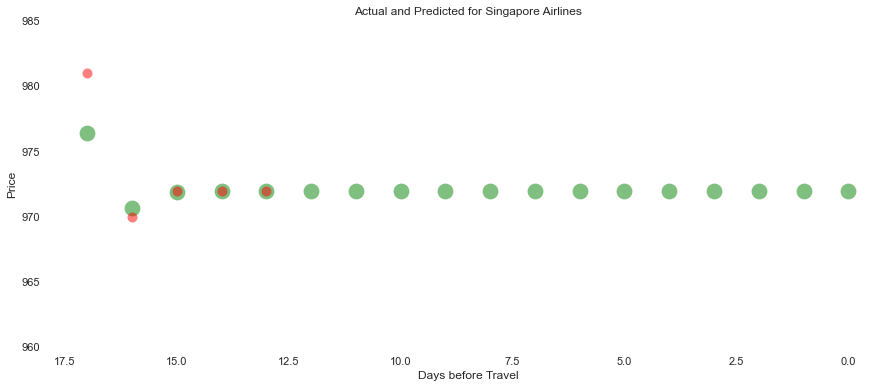

In [31]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.scatter(x = range(0, pred.size), y=pred, c = 'green', label = 'Actual', alpha = 0.5, s=250, 
           linewidth=0, edgecolors='green')
ax.scatter(x = range(0, actual.size), y=actual, c = 'red', label = 'Predicted', alpha = 0.5, s=100, 
           linewidth=0, edgecolors='red')
plt.title('Actual and Predicted for Singapore Airlines') 
plt.xlabel('Days before Travel')
plt.ylabel('Price')
plt.gca().invert_xaxis()
ax.set_facecolor("white")
plt.ylim(960, 985)
plt.show()